In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from matplotlib import patches, cm

from endoanalysis.keypoints import load_keypoints

In [12]:
NUM_IMAGES=3
FIGSIZE = 8
POINTS_SIZE = 3
CMAP = {0:"red", 1: "green", 2: "blue"}
images_dir = "../data/Dataset/images/Bulk/Pathologists/"
images_context_dir = "../data/Dataset/images_context//Bulk/Pathologists/"
labels_dir = "../data/Dataset/labels/Bulk/Pathologists/"

In [13]:
all_ids = [x for x in  os.listdir(images_dir)]

In [14]:
ids_chosen = ['1698.png', '3306.png', '2270.png']

In [18]:
ids_chosen =np.random.choice(all_ids, size=NUM_IMAGES)
images_paths = [os.path.join(images_dir, x) for x in ids_chosen]
images_context_paths = [os.path.join(images_context_dir, x) for x in ids_chosen]
labels_paths = [os.path.join(labels_dir, x.split(".")[0] + ".txt") for x in ids_chosen]

images_batch = [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB)  for x in images_paths]
images_context_batch = [cv2.cvtColor(cv2.imread(x), cv2.COLOR_BGR2RGB) for x in images_context_paths]
keypoints_batch = [ load_keypoints(x) for x in labels_paths]

In [19]:
for image_context in images_context_batch:
    x_size, y_size = image_context.shape[:2]
    image_context = cv2.rectangle(
        image_context, 
        (np.round( y_size / 3).astype(int),
         np.round( x_size / 3).astype(int)), 
        (np.round( 2 * y_size / 3).astype(int),
         np.round( 2 * x_size / 3).astype(int)), 
        (0,200,0),
        8
    )

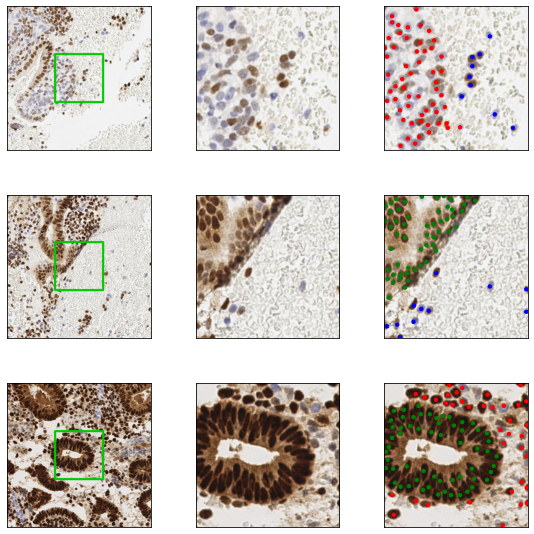

In [20]:

fig, ax = plt.subplots( NUM_IMAGES, 3, figsize= (FIGSIZE,FIGSIZE* NUM_IMAGES/3))
fig.tight_layout()
for image_i, (image, image_context, keypoints )in enumerate(zip(images_batch, images_context_batch, keypoints_batch)):
    ax[image_i, 0].imshow(image_context)
    ax[image_i, 1].imshow(image)
    ax[image_i, 2].imshow(image)
    for keypoint in keypoints:
        color = CMAP[keypoint[2]]
        patch = patches.Circle((keypoint[0], keypoint[1]), color=color, radius=POINTS_SIZE)
        ax[image_i, 2].add_patch(patch)
        
    for i in range(3): 
        ax[image_i,i].tick_params(
            axis='both',          
            which='both',       
            bottom=False,      
            left=False,
            labelbottom=False,
            labelleft=False
        ) 
    

fig.savefig("figs/images_context.png")